In [1]:
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.morphology import binary_erosion, binary_dilation, binary_closing,skeletonize, thin
from skimage.measure import find_contours
from skimage.draw import rectangle
from skimage.filters import threshold_local
from scipy import fftpack
from scipy.signal import convolve2d
# Show the figures / plots inside the notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

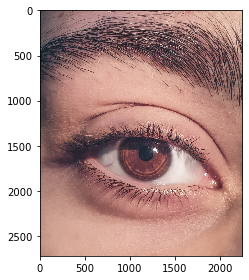

In [2]:

def histogramEqualization(img):
    gray_img =rgb2gray(img)
    if(gray_img.dtype != 'uint8'): 
        gray_img = 255 * gray_img # Now scale by 255
        gray_img = gray_img.astype(np.uint8)
    #get image size
    G=256
    N=gray_img.shape[0]
    M=gray_img.shape[1]
    # array og histogram
    H= [0] * G
    H_c= [0] * G
    T= [0] * G
    #set the histogram array in H array 
    size=len(list(np.histogram(gray_img, 256))[1])
    start=int( list(np.histogram(gray_img, 256))[1][0])
    end=int(list(np.histogram(gray_img, 256))[1][size-1])
    
    k=0
    for i in range(start,end):
        H[i]=list(np.histogram(gray_img, 256))[0][k]
        H[i]=int( H[i])
        k+=1  
    #cumulative histogram
    H_c[0] = H[0]
    for i in range(1,G):
         H_c[i] = H_c[i-1] + H[i]        
    #mapping between gray-levels
    for i in range(0,G):
         T[i] = round( (G-1) *H_c[i]/(N * M) )
    # pixels = img.load()        
    for i in range (0, N-1):
        for j in range (0, M-1):
            Pixel = gray_img[i][j]
            gray_img[i][j] = round(T[Pixel])
    return img;
            
           
img = io.imread('images/brown_eye.jpg')
new=histogramEqualization(img)    
io.imshow(new)
io.show()

  